In [1]:
# All of this data was extracted from IPUMS CPS ----

#Sarah Flood, Miriam King, Renae Rodgers, Steven Ruggles, 
#J. Robert Warren, Daniel Backman, 
#Annie Chen, Grace Cooper, 
#Stephanie Richards,
#Megan Schouweiler, and Michael Westberry. 
#IPUMS CPS: Version 11.0 [dataset]. Minneapolis, MN: IPUMS, 2023. https://doi.org/10.18128/D030.V11.0

In [2]:
# This is a trial. NONE OF THIS IS TO BE TAKEN AS ACCURATE
# If you are associated with any of the data I extracted and want me to take it down,
#I will take it down and I am sincerly sorry
# if any of this is misrepresented poorly

#EDA,Data Cleaning, importing libraries,

import pandas as pd
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('C:/ML/le/extracts/supply.csv',delimiter=',',nrows=10000)


df.isna().sum()
print(df.dtypes)
df.nunique()
df['SEX'].value_counts()
df['SEX'] = pd.get_dummies(df.SEX,prefix='SEX').iloc[:,0:1]
woman_with_young_children = df[(df['SEX'] == 0) & (df['NCHLT5'] == 1)]
woman_without_young_children = df[(df['SEX'] == 0) & (df['NCHLT5'] != 1)]


#laborforce variable



YEAR          int64
LABFORCE      int64
SEX           int64
AGE           int64
NCHLT5        int64
ASECWT      float64
dtype: object


<Axes: >

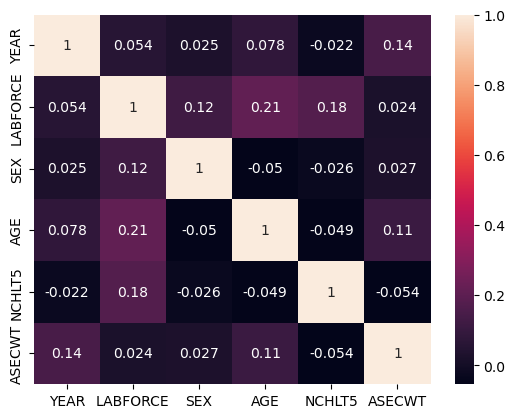

In [3]:
# Correlation of the features using seaborn and matplotlib and creating two variables:
# Men with and without young children, this will be elaborated in later cells

# Men with and without young children
men_with_young_children = df[(df['SEX'] == 1) & (df['NCHLT5'] == 1)]
men_without_young_children = df[(df['SEX'] == 1) & (df['NCHLT5'] != 1)]

import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(df.corr(),annot=True)

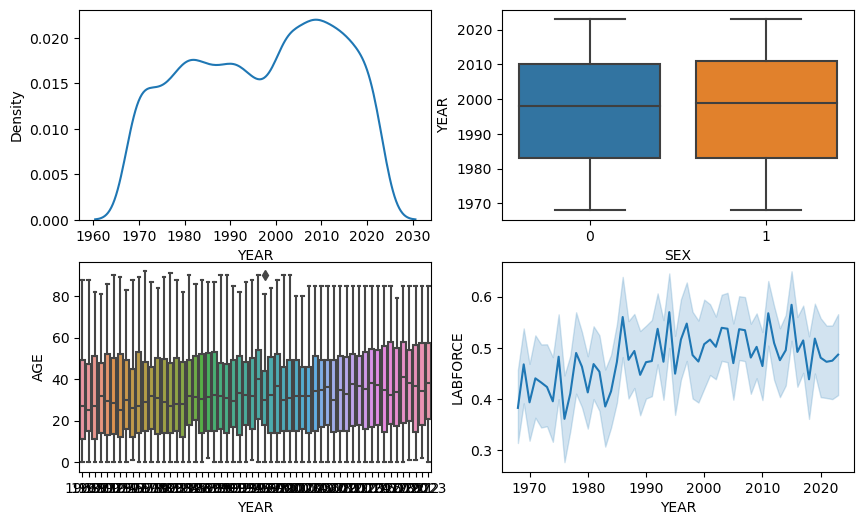

In [4]:
#Visuals of the features
def subplots(df):
    _,axs = plt.subplots(2,2,figsize=(10,6))
    sns.kdeplot(x='YEAR',ax=axs[0,0],data=df)
    sns.boxplot(x='SEX',y='YEAR',ax=axs[0,1],data=df)
    sns.boxplot(x='YEAR',y='AGE',ax=axs[1,0],data=df)
    sns.lineplot(x='YEAR',y='LABFORCE',ax=axs[1,1],data=df)
    plt.show()

subplots(df)

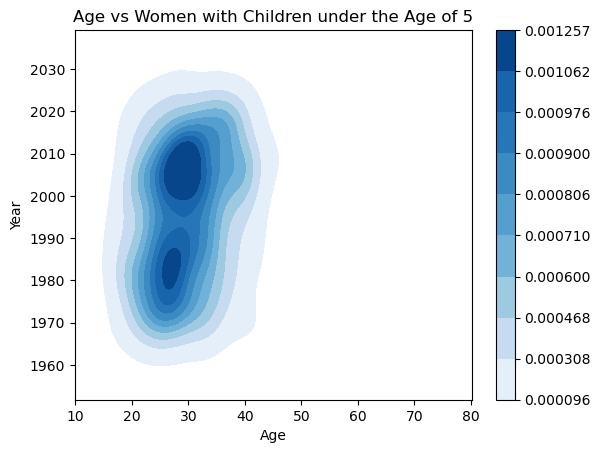

In [5]:
# young children, based on the data is someone who has a child who is five-years old or younger
def Woman_with_children(df):
    sns.kdeplot(data=woman_with_young_children,x='AGE',y='YEAR',fill=True,cmap='Blues',cbar=True)
    plt.title('Age vs Women with Children under the Age of 5')
    plt.xlabel('Age')
    plt.ylabel('Year')
    plt.show()

Woman_with_children(df)


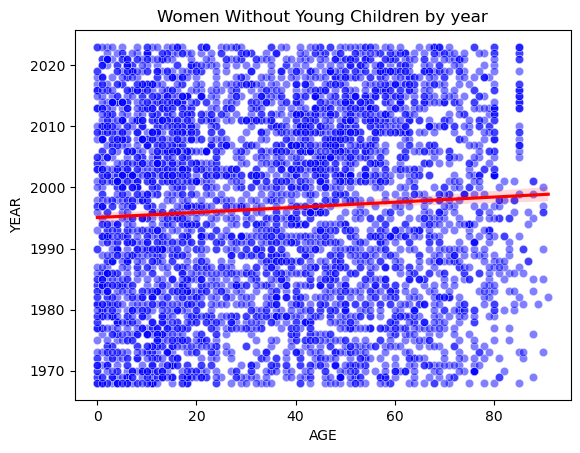

In [6]:
def women_with_no_children(df):
    sns.scatterplot(x='AGE',y='YEAR',data=woman_without_young_children,marker='o',color='blue',alpha=0.5)
    sns.regplot(x='AGE',y='YEAR',data=woman_without_young_children,scatter=False,color='red')
    plt.xlabel('AGE')
    plt.ylabel('YEAR')
    plt.title('Women Without Young Children by year')
    plt.show()


women_with_no_children(df)


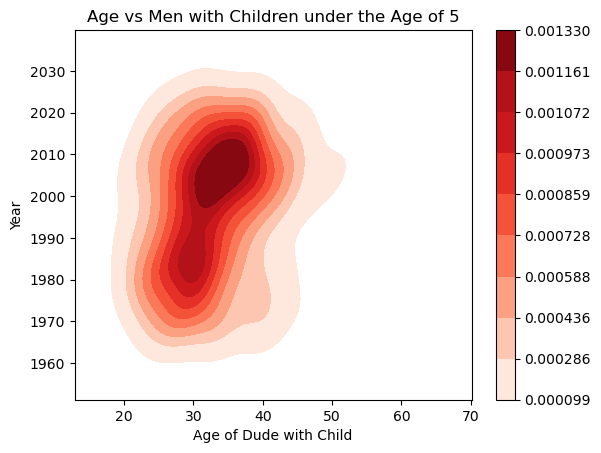

In [7]:
def men_with_children(df):
    sns.kdeplot(data=men_with_young_children, x='AGE',y='YEAR',fill=True,cmap='Reds',cbar=True)
    plt.title('Age vs Men with Children under the Age of 5')
    plt.xlabel('Age of Dude with Child')
    plt.ylabel('Year')
    plt.show()

men_with_children(df)

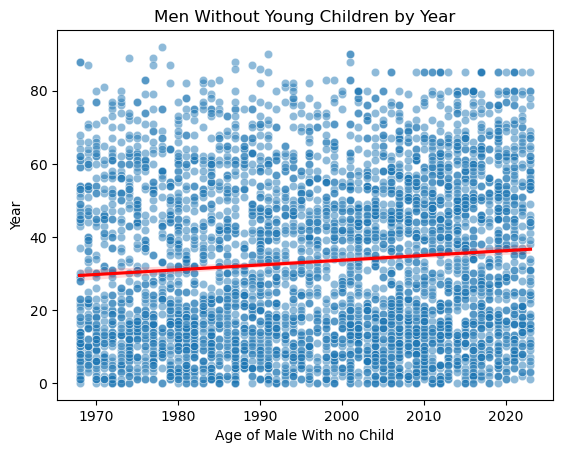

In [8]:
def men_with_no_children(df):
    sns.scatterplot(x='YEAR',y='AGE',data=men_without_young_children,alpha=0.5)
    sns.regplot(x='YEAR',y='AGE', data=men_without_young_children,scatter=False,color='red')
    plt.title('Men Without Young Children by Year')
    plt.xlabel('Age of Male With no Child')
    plt.ylabel('Year')
    plt.show()

men_with_no_children(df)


In [9]:
#Using statsmodels to see which indepndent variables are statistically significiant through OLS 
# 'LABFORCE' = Labor Force. 
import statsmodels.api as sm

X_sex = sm.add_constant(df['AGE'])
y = df['LABFORCE']

model = sm.OLS(exog=X_sex,endog=y).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               LABFORCE   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     469.0
Date:                Tue, 23 Jan 2024   Prob (F-statistic):          1.14e-101
Time:                        12:56:53   Log-Likelihood:                -7023.0
No. Observations:               10000   AIC:                         1.405e+04
Df Residuals:                    9998   BIC:                         1.406e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3194      0.009     35.477      0.0

In [10]:
X_year = sm.add_constant(df['YEAR'])
y_labforce = df['LABFORCE']
model_year = sm.OLS(exog=X_year,endog=y_labforce).fit()
print(model_year.summary())


                            OLS Regression Results                            
Dep. Variable:               LABFORCE   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     29.28
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           6.42e-08
Time:                        12:56:53   Log-Likelihood:                -7237.6
No. Observations:               10000   AIC:                         1.448e+04
Df Residuals:                    9998   BIC:                         1.449e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9027      0.626     -4.639      0.0

In [11]:
# I dropped the sample weight due to nans for this OLS ANOVA Table
#all together

X = df.drop(['LABFORCE','ASECWT'],axis=1)
y = df['LABFORCE']

model_full = sm.OLS(exog=sm.add_constant(X),endog=y).fit()
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:               LABFORCE   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     276.5
Date:                Tue, 23 Jan 2024   Prob (F-statistic):          8.46e-226
Time:                        12:56:53   Log-Likelihood:                -6727.5
No. Observations:               10000   AIC:                         1.346e+04
Df Residuals:                    9995   BIC:                         1.350e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1330      0.596     -3.577      0.0

LogisticRegression, --ACC-- 46.65%; --ROC-- 69.23%
GradientBoostingClassifier, --ACC-- 53.35%; --ROC-- 90.64%
BaggingClassifier, --ACC-- 53.35%; --ROC-- 86.96%
SVC, --ACC-- 53.35%; --ROC-- 89.77%
LinearDiscriminantAnalysis, --ACC-- 46.65%; --ROC-- 69.28%
RandomForestClassifier, --ACC-- 53.35%; --ROC-- 87.46%


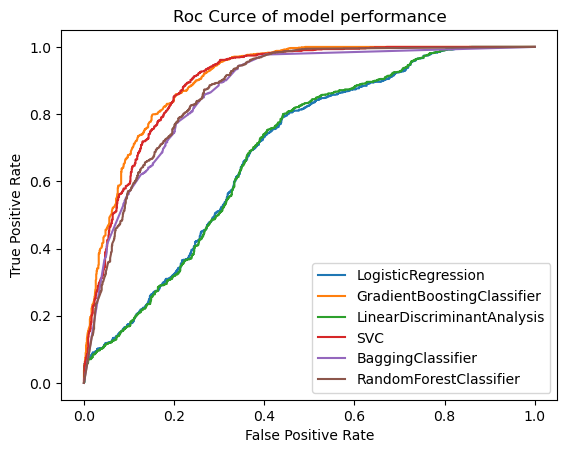

In [12]:
# Logistic Regression,ensemble methods ect.... 1 == part of labor force; 0 == Not in laborforce
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)


from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X_train_scaled = ms.fit_transform(X_train)
X_test_scaled = ms.transform(X_test)


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
rfc = RandomForestClassifier()
GBC = GradientBoostingClassifier()
BC = BaggingClassifier()

from sklearn.svm import SVC
svc = SVC(probability=True)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()


from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score

def evaluate_model(model,X_train_scaled,X_test_scaled,y_train,y_test):
    model = model.fit(X_train_scaled,y_train)
    pred = model.predict(X_test)
    pred_prob = model.predict_proba(X_test_scaled)[:,1]
    acc = accuracy_score(y_test, pred)
    roc = roc_auc_score(y_test, pred_prob)
    print(f'{model.__class__.__name__}, --ACC-- {acc*100:.2f}%; --ROC-- {roc*100:.2f}%')
    return pred,pred_prob



lr_pred,lr_pred_prob = evaluate_model(lr, X_train_scaled, X_test_scaled, y_train, y_test)
GBC_pred,GBC_pred_prob = evaluate_model(GBC, X_train_scaled, X_test_scaled, y_train, y_test)
BC_pred,BC_pred_prob = evaluate_model(BC, X_train_scaled, X_test_scaled, y_train, y_test)
svc_pred,svc_pred_prob = evaluate_model(svc, X_train_scaled, X_test_scaled, y_train, y_test)
lda_pred,lda_pred_prob = evaluate_model(lda, X_train_scaled, X_test_scaled, y_train, y_test)
rfc_pred,rfc_pred_prob = evaluate_model(rfc, X_train_scaled, X_test_scaled, y_train, y_test)


def ROC(y_test,y_pred_prob,model):
    fpr,tpr, _ = roc_curve(y_test,y_pred_prob)
    plt.plot(fpr,tpr,label=model.__class__.__name__)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curce of model performance')
    
    
ROC(y_test,lr_pred_prob,lr)
ROC(y_test,GBC_pred_prob,GBC)
ROC(y_test,lda_pred_prob,lda)
ROC(y_test,svc_pred_prob,svc)
ROC(y_test,BC_pred_prob,BC)
ROC(y_test,rfc_pred_prob,rfc)
plt.legend()
plt.show()